#  Clustering 2

In [2]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
#cmap = ListedColormap(["Red","Green","Blue"])
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
cmap = ListedColormap(color_array)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Пример: набор данных MNIST

Набор данных рукописных цифр MNIST состоит из изображений рукописных цифр вместе с метками, указывающими, какая цифра находится на каждом изображении.

Поскольку в этом наборе данных присутствуют как объекты, так и метки (а метки для больших наборов данных обычно трудно/дорого получить), этот набор данных часто используется в качестве эталона для сравнения различных методов.
Например, [эта веб-страница](http://yann.lecun.com/exdb/mnist/) описывает множество различных результатов классификации в MNIST (обратите внимание, тесты на этом веб-сайте предназначены для набора данных большего размера и с более высоким разрешением, чем мы воспользуюсь.) Чтобы увидеть сравнение методов классификации, реализованных в scikit-learn в наборе данных MNIST, см.
[эта страница](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
Набор данных MNIST также часто используется для сравнительного анализа алгоритмов кластеризации, и поскольку он имеет метки, мы можем оценить однородность или чистоту кластеров.

Существует несколько версий набора данных. Мы будем использовать тот, который встроен в scikit-learn и описан [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

* Классы: 10
* Образцы на класс: $\approx$180.
* Всего образцов: 1797
* Размерность: 64 (8 пикселей на 8 пикселей)
* Возможности: целые числа 0–16.

Вот несколько примеров изображений. Обратите внимание, что цифры нормализованы по размеру и центрированы в изображении фиксированного размера ($8\times8$ пикселей).

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


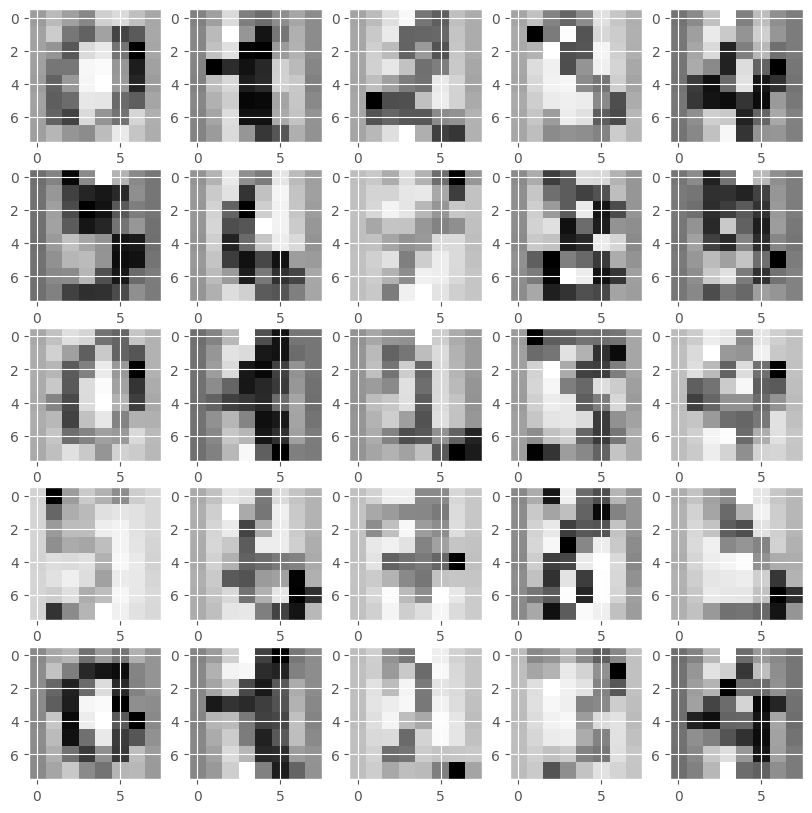

In [3]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

#### K-means clustering
Сначала мы используем метод k-средних для кластеризации набора данных и вычисления показателя однородности для кластеризации.

In [7]:

kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

0.6038203825261589

#### Упражнение: Иерархическая кластеризация
Используйте метод иерархической кластеризации для кластеризации набора данных. Снова вычислите однородность.

*Подсказка:* Используйте функцию scikit-learn *AgglomerativeClustering*.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.9999999999999998

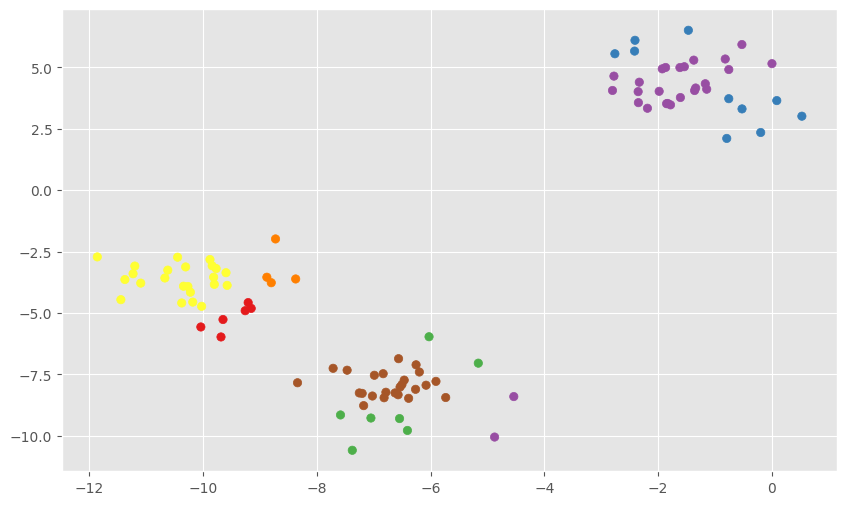

In [13]:
agg_cluster_model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=n_digits)
y_pred = agg_cluster_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

metrics.homogeneity_score(labels_true=y, labels_pred=y_pred )

#### Упражнение: DBScan

Используйте DBScan для кластеризации набора данных. Проблема, с которой вы столкнетесь, — это выбор $\epsilon$. Вы можете использовать функцию DistanceMetric, чтобы получить представление о типичных расстояниях между точками.

In [15]:
import pandas as pd
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
distances = dist.pairwise(X)
distances
df = pd.DataFrame(distances)
df.describe()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,8.395661,6.027449,7.166282,6.204058,7.590343,6.792764,6.998641,6.007373,9.324290,8.916718,...,6.720430,8.472236,9.064647,6.589954,5.932516,6.162410,7.577907,9.438772,6.376279,9.340998
std,4.362765,4.519840,4.863163,4.199153,4.556821,5.183119,5.326121,4.468610,5.451069,5.639582,...,4.922201,5.302937,5.691887,4.586038,3.947333,3.924938,5.581176,5.862947,4.700518,5.368420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.129533,2.182445,2.237660,1.646791,2.667042,1.643250,1.610465,2.019255,2.283673,1.649258,...,1.777026,1.828644,1.616404,1.857680,2.143407,2.945195,2.040324,1.858606,2.087349,2.422942
50%,10.790533,4.295867,6.071261,5.980061,7.221678,5.794786,6.020267,4.521343,12.040595,12.084066,...,5.795179,11.402049,12.136655,6.198275,5.177950,4.681986,6.329711,12.674598,5.079694,12.418808
75%,11.638387,11.384264,12.599131,10.527208,12.492932,12.738060,13.124002,11.232140,13.716581,13.224372,...,12.319321,12.537328,13.530754,11.427864,10.215157,10.646228,14.101244,14.004211,11.794821,13.367536
max,14.297560,13.773040,15.064631,12.980880,15.220994,15.379781,15.765861,13.623759,16.786093,16.157511,...,14.963122,15.472205,16.525591,13.896703,12.624990,13.279517,16.739014,16.975780,14.431966,16.069958


Предполагаемое количество кластеров: 3
Примерное количество точек шума: 2
Однородность: 0.987
Полнота: 0.924
V-мера: 0.954


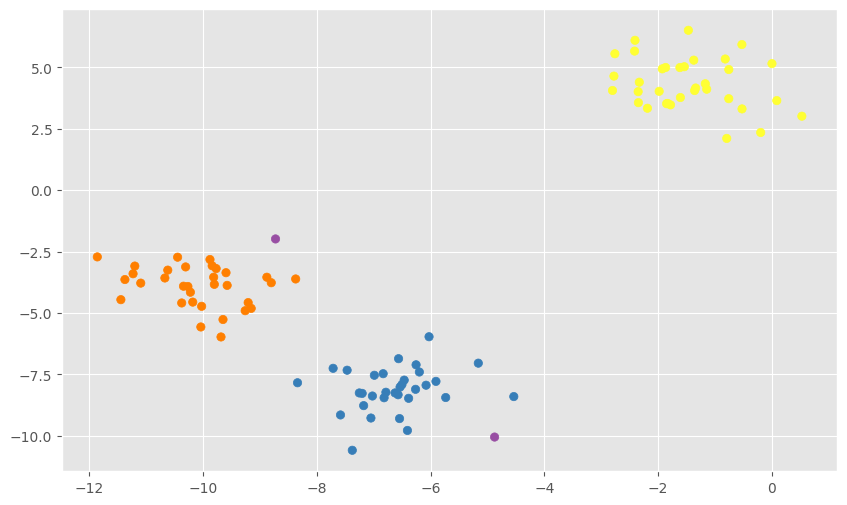

In [30]:
from sklearn.cluster import DBSCAN



db_model = DBSCAN(eps=1.4, min_samples=3)
db_model.fit(X)
y_pred = db_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Предполагаемое количество кластеров: %d' % n_clusters_)
print('Примерное количество точек шума: %d' % n_noise_)
print("Однородность: %0.3f" % metrics.homogeneity_score(y, labels))
print("Полнота: %0.3f" % metrics.completeness_score(y, labels))
print("V-мера: %0.3f" % metrics.v_measure_score(y, labels))

При eps=1.4 наиболее высокие показатели однородности, полноты и V-меры. Данный параметр был взят исходя из анализа выше.

## MNIST: Другие методы кластеризации
Ознакомьтесь с методами кластеризации и опциями различных методов на [странице scikit-learn](http://scikit-learn.org/stable/modules/clustering.html).

**Упражнение.** Изменив следующий код, попытайтесь найти для этого метод кластеризации с наибольшим показателем однородности.

In [42]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

method = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means++", data=X)

method =KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means random", data=X)

method =DBSCAN(eps=0.5, min_samples=5)
compare_method(estimator=method, name="DBSCAN", data=X)

method =AgglomerativeClustering(n_clusters=2)
compare_method(estimator=method, name="Agglomerative", data=X)


__________________________________________________
   method                   time      homo
                k-means++   0.04s     0.049 
           k-means random   0.01s     0.045 
                   DBSCAN   0.00s     0.000 
            Agglomerative   0.00s     0.003 
